# K-Nearest Neighbors

In this notebook you will implement a simple K-NN algorithm and try to see the effect of using different values for the parameter k. Source for the excercise was the book of A.Géron , "Hands-On Machine Learning with Keras, Scikit & Tensorflow", O'Reilly. 
In this exercise we will work with Life satisfaction and GDP Data and we will try to predict the numerical value for Life statisfaction index of Cyprus, based on its GDP.
Add your code where indicated with "#### ADD YOUR CODE HERE#####"

The next function is just a util-function to prepare the data.

In [23]:
import pandas as pd
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # This line filters the oecd_bli DataFrame to keep only the rows where the "INEQUALITY" column has the value "TOT".
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    #This line pivots the DataFrame, treating the "Country" column as the index, the "Indicator" column as columns, and the "Value" column as the values. 
    # This operation effectively transforms the data from a long format to a wide format.
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    #rename 2015 to GDP per capital
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    #This line performs an inner join operation between the oecd_bli and gdp_per_capita DataFrames using their indices (which are both set to "Country")
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
   

The module we need to import to implement the algorithm is sklearn.neighbors.
The 2 datafiles "oecd_bli_2015.csv" and "gdp_per_capita.csv" should be in the same folder as this notebook.

Predicted Life Satisfaction for Cyprus: [5.58]


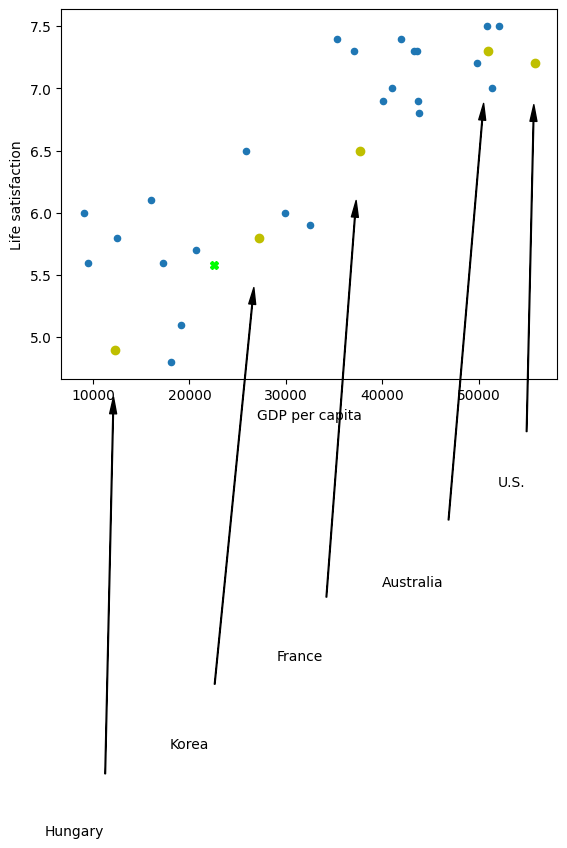

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
#This line creates an array X containing the "GDP per capita" column from the country_stats DataFrame. 
# The np.c_ function concatenates the values along the second axis, effectively creating a 2-dimensional array.
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

#This starts a loop over the items in the position_text dictionary. In each iteration, country will be set to a country name, and pos_text will be set to the associated position
for country, pos_text in position_text.items():
    #This line extracts the GDP per capita (pos_data_x) and Life satisfaction (pos_data_y) values for the current country from the country_stats DataFrame. 
    pos_data_x, pos_data_y = country_stats.loc[country]
    country = "U.S." if country == "United States" else country
    #This line adds an annotation to the plot. It places the text country at the point specified by xy=(pos_data_x, pos_data_y) and positions the text based on xytext=pos_text. The arrowprops argument specifies the appearance of the arrow that points from the text to the point.
    #plt.plot(pos_data_x, pos_data_y, "ro"): This line plots a red dot at the coordinates (pos_data_x, pos_data_y) on the plot.
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    # yo = yellow dot
    plt.plot(pos_data_x, pos_data_y, "yo")


# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 5)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
predictioncyp = model.predict(X_new)
print(f"Predicted Life Satisfaction for Cyprus: {predictioncyp[0]}")

plt.plot(X_new, model.predict(X_new), 'X', color='lime')
plt.show()

Try now to change the number of neighbors on which your prediction is based. Consider for example the extremes cases of n_neighbors = 1 or 25. 

How does the prediction for Cyprus chage wrt to n_neighbors (=k)?
Can you guess why?

In [ ]:
#write down here your answers to the questions above

#If using 1 the predicition will lead to the result of 5.7, this is due to using only the closest data point to Cyprus. which could be sensitive to outliers.
#when using 25 as k the result is based on the 25 nearst countries which leads to the result of 6.372. This is due to taking the average life satisfaction of these 25 countries. 